#Feature Scaling
In this notebook we implement two methods of feature scaling to bring all the paramters on same scale.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
books = books.dropna(axis = 1)
exog = books.iloc[:,2:]
sales

,Year_Month,Sum of Sales
0,2008-01,282604.11
1,2008-02,262474.40
2,2008-03,326059.68
3,2008-04,215387.49
4,2008-05,499559.90
...,...,...
150,2020-07,150348.10
151,2020-08,156066.95
152,2020-09,468710.96
153,2020-10,1118446.80


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


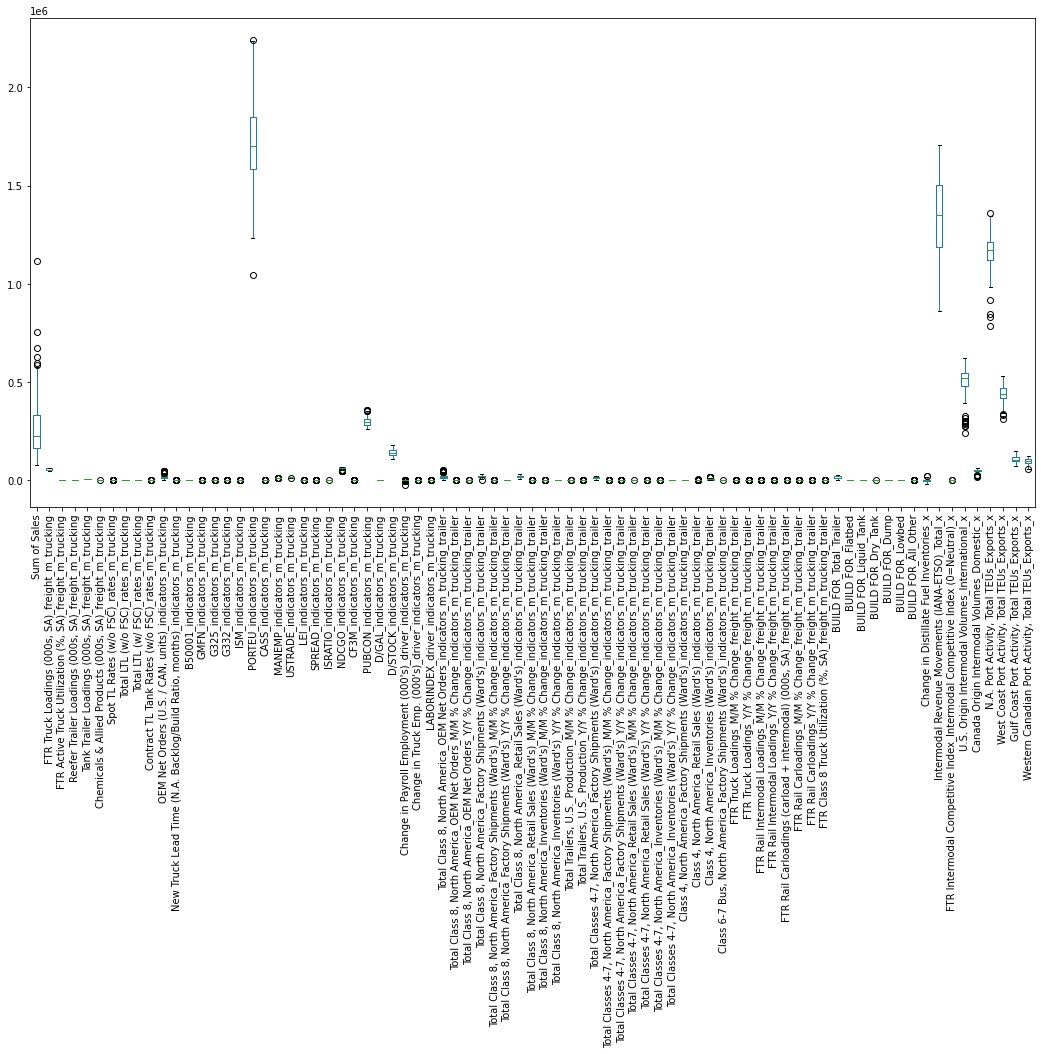

In [5]:
books.plot.box(figsize=(18, 9),rot=90)

#Scaling
### Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

After this, all the features will have a minimum value of 0 and a maximum value of 1.

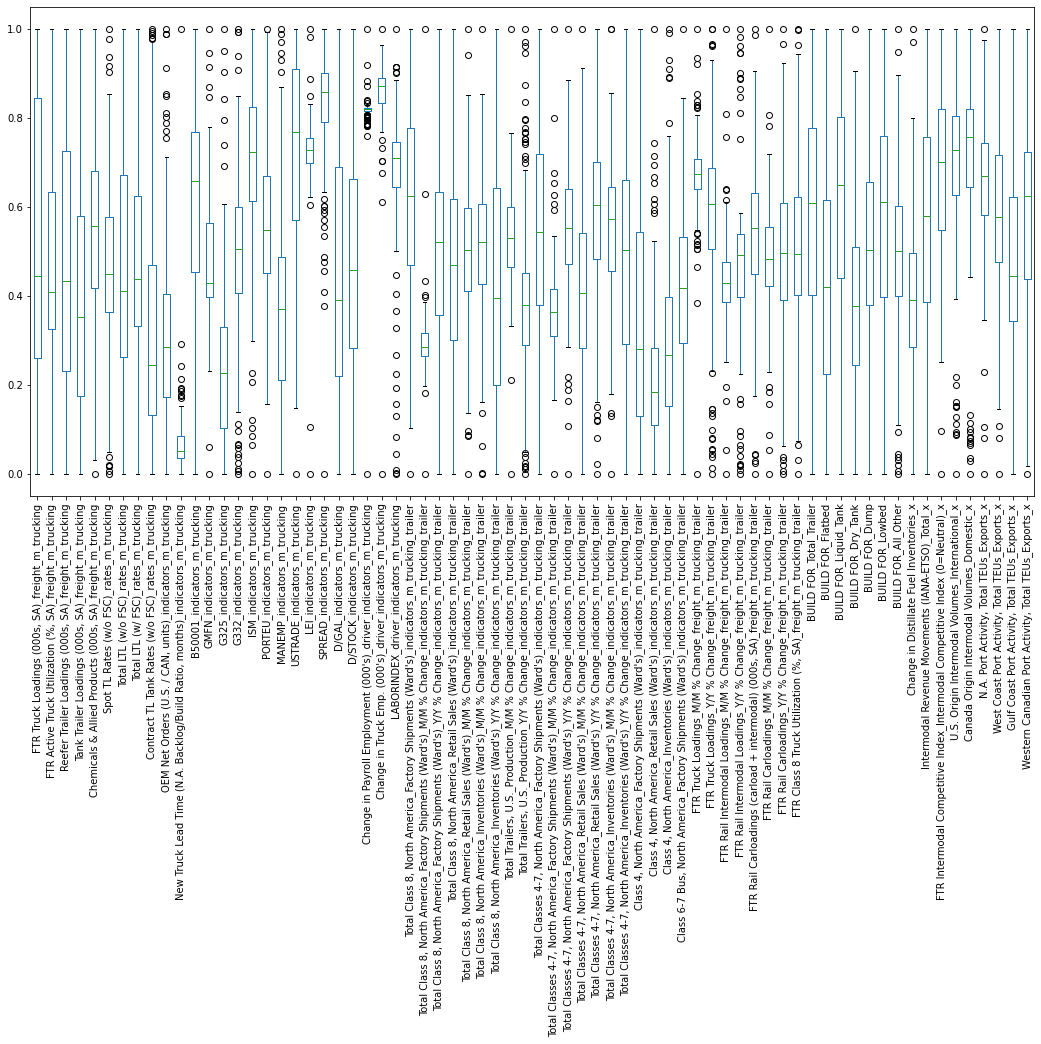

In [8]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(exog)
exog_norm = pd.DataFrame(norm.transform(exog),columns=exog.columns)
exog_norm.plot.box(figsize=(18, 9),rot=90)

# Standardization